**<h1 style="color:#06344ef6;text-align:center;font-size:35px;font-family:Bodoni MT"> ANALYSE EXPLORATOIRE DES DONNÉES </h1>**


<span style="text-align:justify;font-size:15px;font-family:times">
Le but de cette partie est, comme son nom l'indique, d'effectuer des analyses descriptives sur l'ensemble des données à notre disposition .

Nous travaillerons sur un ensemble de données de séries chronologiques composé de plusieurs variables dont les ventes quotidiennes de diverses produits, fournies par une société russe du nom de *1C Company* .
Il nous a été fourni un ensemble de 5 bases de données que sont : 
- **sales_train.csv** : Données quotidiennes de janvier 2013 à octobre 2015;
- **test.csv** : le jeu de test sur lequel nous testerons le modèle; 
- **items.csv** : informations supplémentaires sur les articles/produits;
- **item_categories.csv** : informations supplémentaires sur les catégories d'articles;
- **shops.csv** : informations supplémentaires sur les magasins.

In [2]:
# Chargement des packages
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

## chargement des différentes bases

In [3]:
# Voir le répertoire courant et le modifier 
os.getcwd()
os.chdir('D:\ensae_its4_2023\Machine learning\PROJET_ML\data')
# Importation des bases
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
shops = pd.read_csv('shops.csv')
items = pd.read_csv('items.csv')
categories = pd.read_csv('item_categories.csv')

## description globale

In [4]:
display(train.head(), test.head(),shops.head(), items.head(), categories.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
# infos supplémentaires
train.info()
test.info()
shops.info()
items.info()
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
d

<span style="text-align:justify;font-size:15px;font-family:times">
Nous avons, au sein des nos différentes bases de données, un total de 11 variables que sont :

- **date** : renseigne la date exacte de la vente au format jj/mm/aaaa
- **date_block_num** : un numéro pour désigner les mois consécutifs à partir de Janvier 2013 ==> 0, février 2013 ==>1 ... jusqu'en octobre 2015 ==> 33.
- **shop_id** : identifiant unique d'une boutique
- **item_id** :identifiant unique d'un produit
- **item_price** : prix d'un produit
- **item_cnt_day** :nombre de produits vendus par jour.
- **item_category_id** : identifiant unique de la catégorie d'un produit
- **item_name** : nom du produit
- **shop_name** :nom de la boutique
- **item_category_name** :nom de la catégorie de l'article
- **ID** :un identifiant qui représente un 2-uple (magasin, article) dans l'ensemble de tests.
    
L'étude se fait sur un ensemble de 2935849  individus (association numéro mois, id de l'article et du magasin) avec 22170 articles distincts répartis en 84 catégories et vendus dans 60 magasins.


In [6]:
# Description de la base principale
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


**commentaires apres**

In [7]:
# regrouper les ventes par mois
train_group = train.groupby(['date_block_num', 'shop_id', 'item_id'],
                                  as_index=False).agg( {"item_cnt_day": ["sum"],"item_price": ["mean"]})
train_group.columns = ['date_block_num', 'shop_id', 'item_id','item_cnt_month','item_price']
train_group
# fusionner train_group et items pour ajouter les catégories correspondants à chaque article
train_month = pd.merge(train_group,items, on = 'item_id', how='left')
train_month.drop('item_name', axis = 1, inplace = True)
train_month

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_category_id
0,0,0,32,6.0,221.0,40
1,0,0,33,3.0,347.0,37
2,0,0,35,1.0,247.0,40
3,0,0,43,1.0,221.0,40
4,0,0,51,2.0,128.5,57
...,...,...,...,...,...,...
1609119,33,59,22087,6.0,119.0,83
1609120,33,59,22088,2.0,119.0,83
1609121,33,59,22091,1.0,179.0,83
1609122,33,59,22100,1.0,629.0,42


In [8]:
train_month.describe()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_category_id
count,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06
mean,1.466479e+01,3.280585e+01,1.068099e+04,2.267200e+00,7.908847e+02,4.154192e+01
std,9.542322e+00,1.653701e+01,6.238883e+03,8.649882e+00,1.551605e+03,1.632365e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01,9.000000e-02,0.000000e+00
25%,6.000000e+00,2.100000e+01,5.045000e+03,1.000000e+00,1.990000e+02,3.000000e+01
50%,1.400000e+01,3.100000e+01,1.049700e+04,1.000000e+00,3.990000e+02,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.606000e+04,2.000000e+00,8.985000e+02,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,2.253000e+03,3.079800e+05,8.300000e+01


In [9]:
#  configurer les paramètres de style des graphiques 
sns.set( font='Consolas',font_scale=1,  palette='colorblind', rc={'figure.figsize':(13, 5), 
                                                                  'axes.titlesize': 15})

## distribution des ventes et des prix 

In [ ]:
# trop lourd
# fig, axs = plt.subplots(1,2, figsize=(15, 5))
# sns.histplot(train_month['item_cnt_month'], kde=True, ax=axs[0])
# axs[0].set_title('Distribution des ventes mensuelles')

# sns.histplot(train_month['item_price'], kde=True, ax=axs[1])
# axs[1].set_title('Distribution des prix')

Text(0.5, 1.0, 'boxplot des prix')

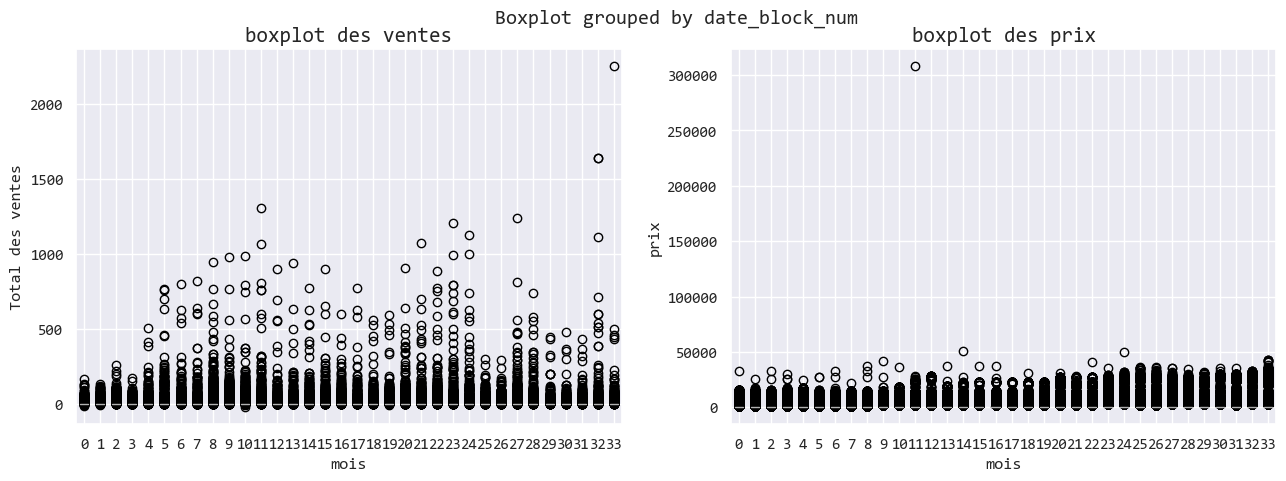

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
#boxplot des ventes
train_month.boxplot(column=['item_cnt_month'], by='date_block_num', ax = axs[0])
axs[0].set_xlabel("mois")
axs[0].set_ylabel("Total des ventes")
axs[0].set_title("boxplot des ventes")


#boxplot des prix
train_month.boxplot(column=['item_price'], by='date_block_num', ax = axs[1])
axs[1].set_xlabel("mois")
axs[1].set_ylabel("prix")
axs[1].set_title("boxplot des prix")

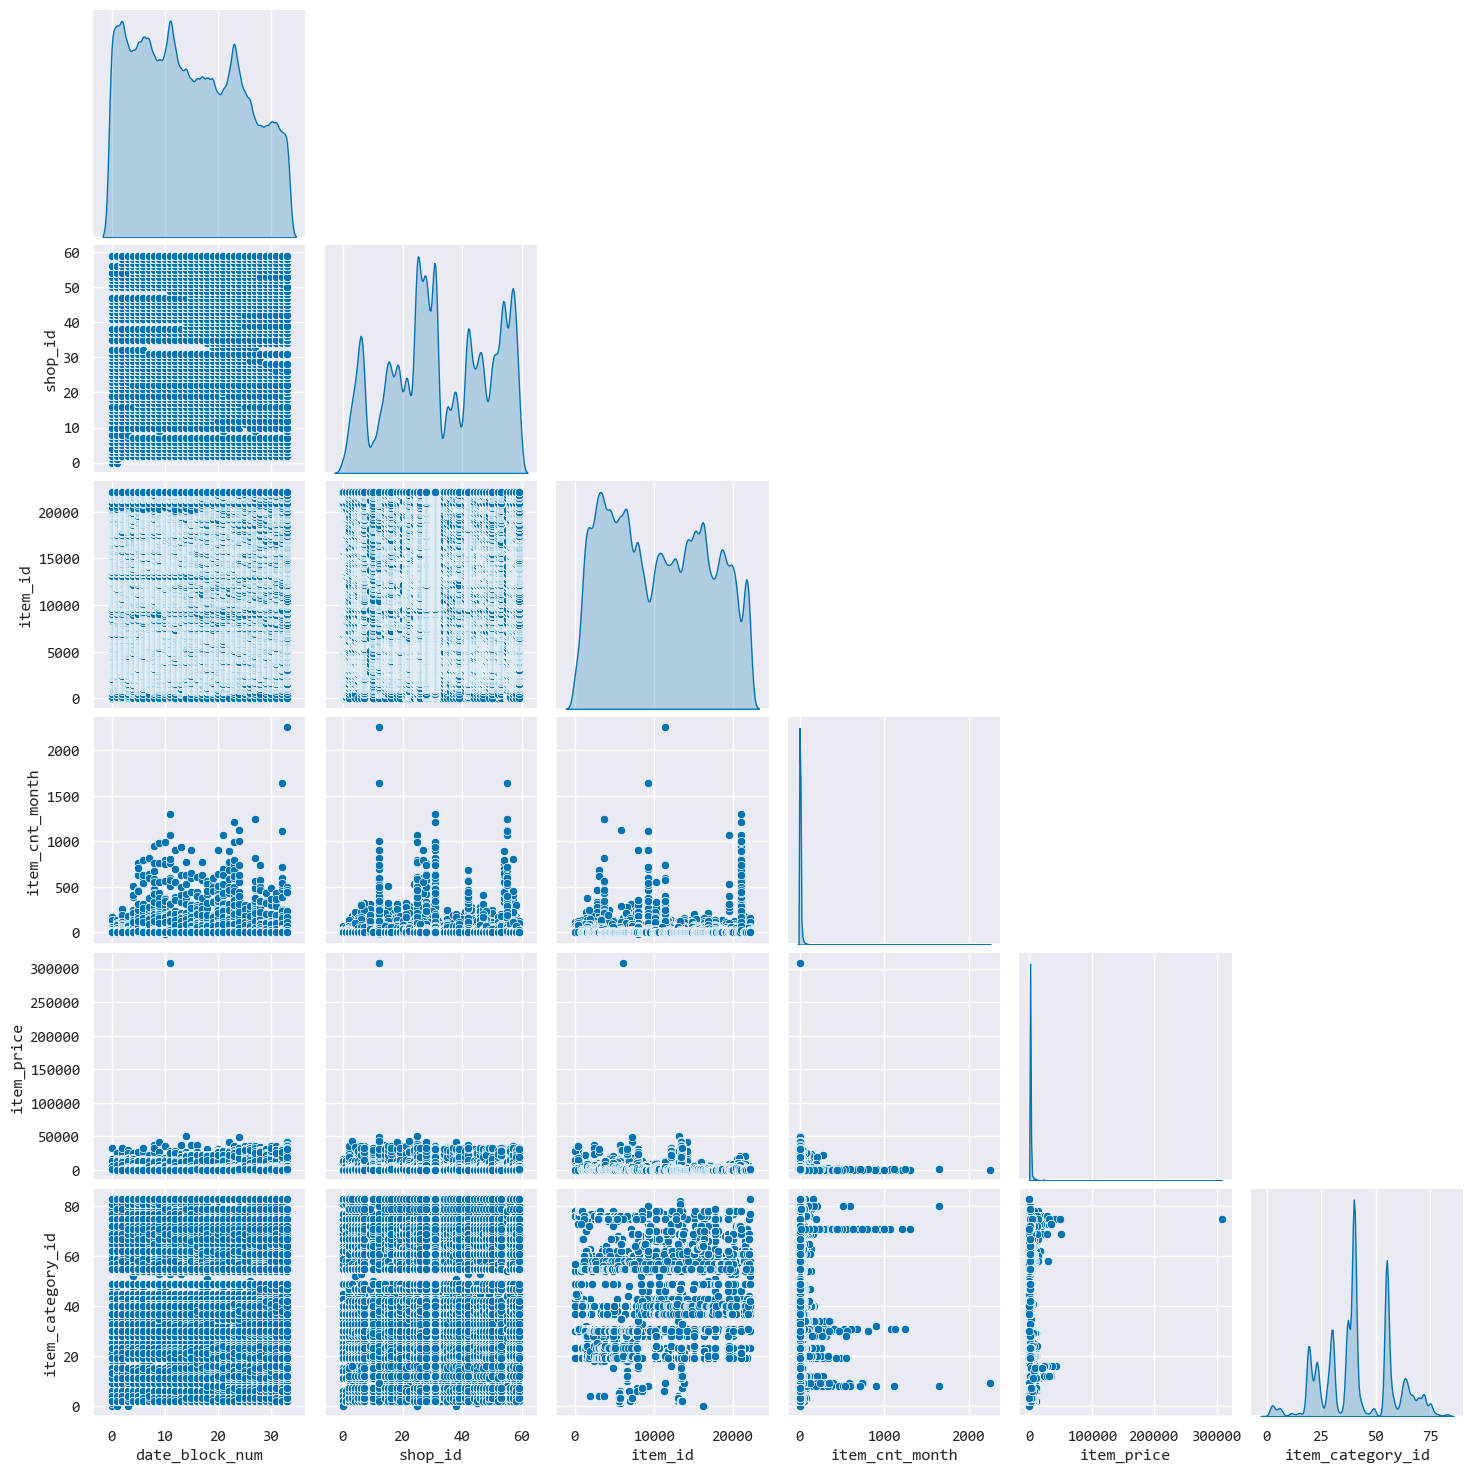

In [138]:
sns.pairplot(train_month, corner=True, diag_kind="kde");

## Distribution des ventes 
- par mois
- par boutique
- par catégorie
- par produit

[Text(0.5, 0, 'Numéro du mois'),
 Text(0, 0.5, 'Total des ventes'),
 Text(0.5, 1.0, 'Distribution des ventes par mois')]

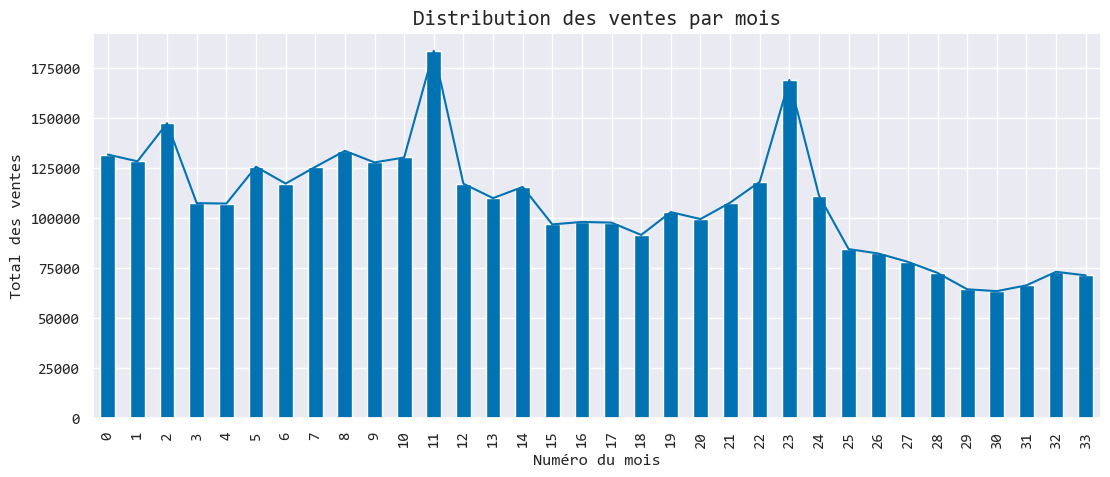

In [20]:
## ventes par mois
train_month.groupby(train_month['date_block_num']).sum()['item_cnt_month'].plot()
train_month.groupby(train_month['date_block_num']).sum()['item_cnt_month'].plot.bar().set(
    xlabel='Numéro du mois', ylabel='Total des ventes',title = "Distribution des ventes par mois")



[Text(0.5, 0, 'Identifiant du magasin'),
 Text(0, 0.5, 'Total des ventes'),
 Text(0.5, 1.0, 'Distribution des ventes par boutique')]

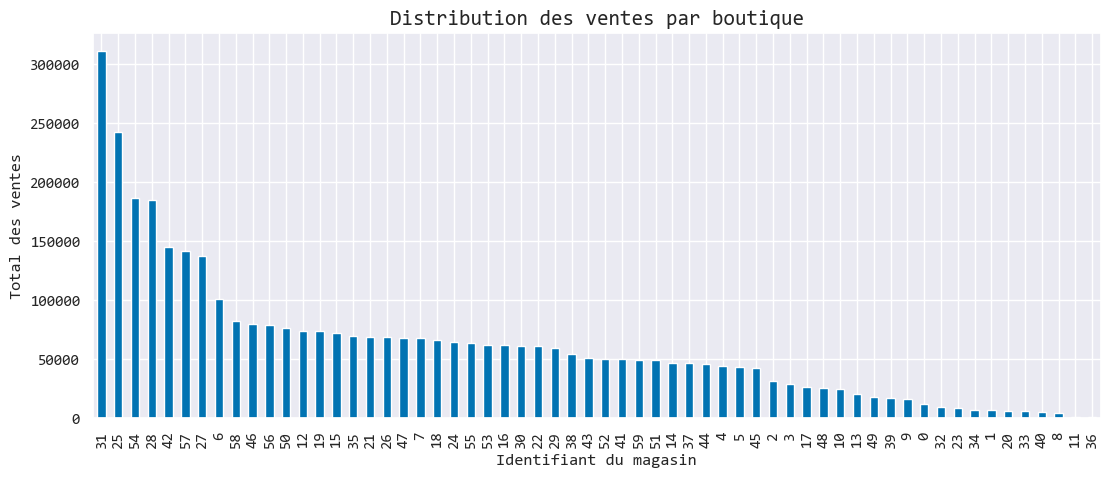

In [21]:
## ventes par magasin

train_month.groupby(train_month['shop_id']).sum()['item_cnt_month'].sort_values(ascending=False).plot.bar().set(
    xlabel='Identifiant du magasin', ylabel='Total des ventes',title = "Distribution des ventes par boutique")


[Text(0.5, 0, 'Identifiant de la catégorie du produit'),
 Text(0, 0.5, 'Total des ventes'),
 Text(0.5, 1.0, 'Distribution des ventes par catégorie de produit')]

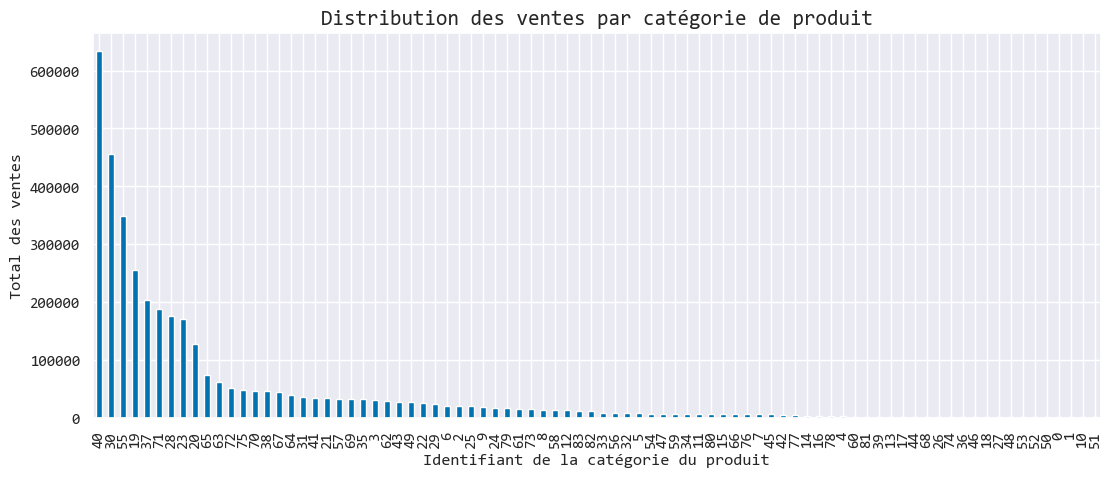

In [22]:
## ventes par catégorie de produit

train_month.groupby(train_month['item_category_id']).sum()['item_cnt_month'].sort_values(ascending=False).plot.bar().set(
    xlabel='Identifiant de la catégorie du produit', ylabel='Total des ventes',title = "Distribution des ventes par catégorie de produit")


[Text(0.5, 0, 'Identifiant du produit'),
 Text(0, 0.5, 'Total des ventes'),
 Text(0.5, 1.0, 'Distribution des ventes par produit (100 premiers)')]

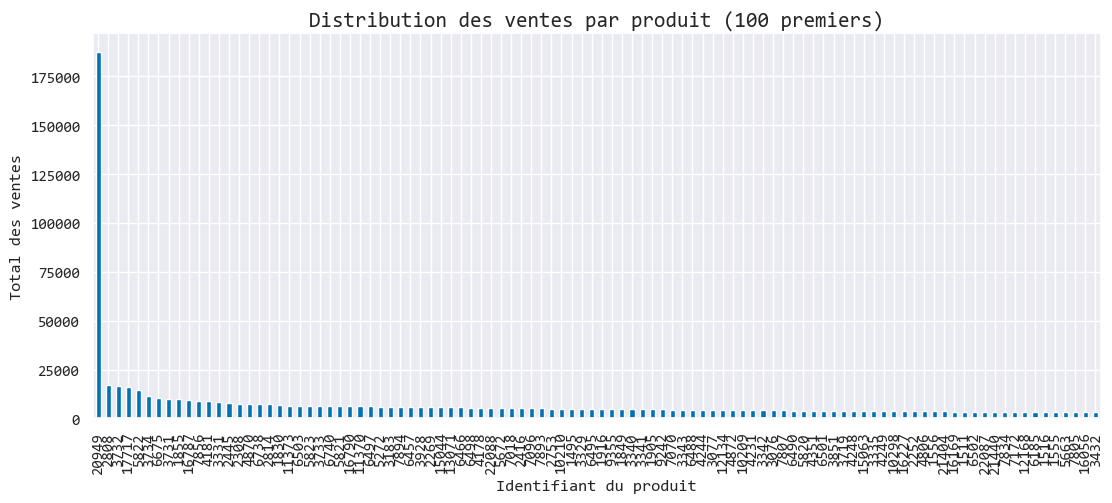

In [23]:
## les 100 produits les plus vendus

train_month.groupby(train_month['item_id']).sum()['item_cnt_month'].sort_values(ascending=False).head(100).plot.bar().set(
    xlabel='Identifiant du produit', ylabel='Total des ventes',title = "Distribution des ventes par produit (100 premiers)")


[Text(0.5, 0, 'Identifiant du produit'),
 Text(0, 0.5, 'Total des ventes'),
 Text(0.5, 1.0, 'Distribution des ventes par produit (100 derniers)')]

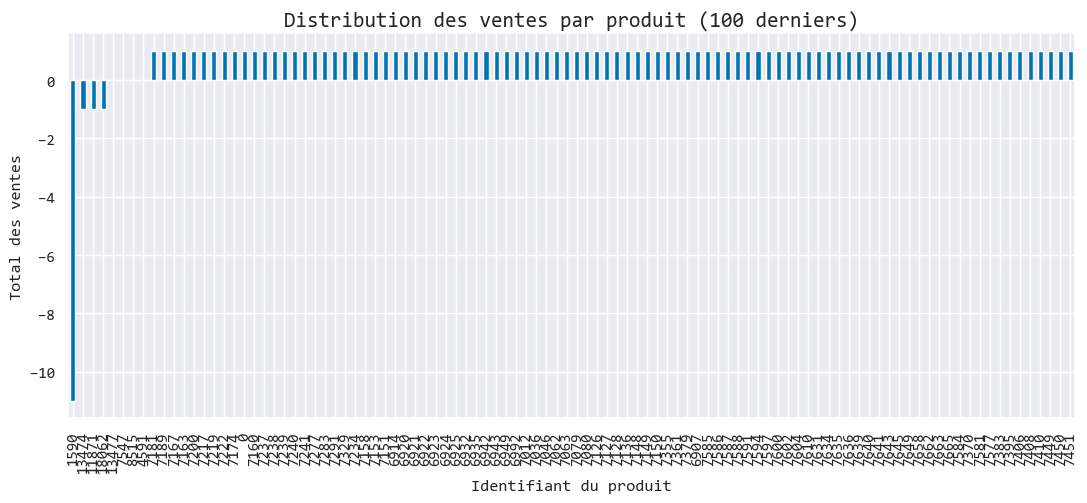

In [30]:
## les 100 produits les moins vendus

train_month.groupby(train_month['item_id']).sum()['item_cnt_month'].sort_values().head(100).plot.bar().set(
    xlabel='Identifiant du produit', ylabel='Total des ventes',title = "Distribution des ventes par produit (100 derniers)")


## Distribution des prix (en moyenne)
- par catégorie
- par produit
- par boutique
- par boutique et par catégorie (les 3 premiers les plus vendus dans chaque boutique)
- par boutique et par article (les 3 premiers les plus vendus dans chaque boutique)

[Text(0.5, 0, 'Identifiant de la catégorie du produit'),
 Text(0, 0.5, 'Moyenne des prix'),
 Text(0.5, 1.0, "Distribution de la moyenne des prix par catégorie d'articles")]

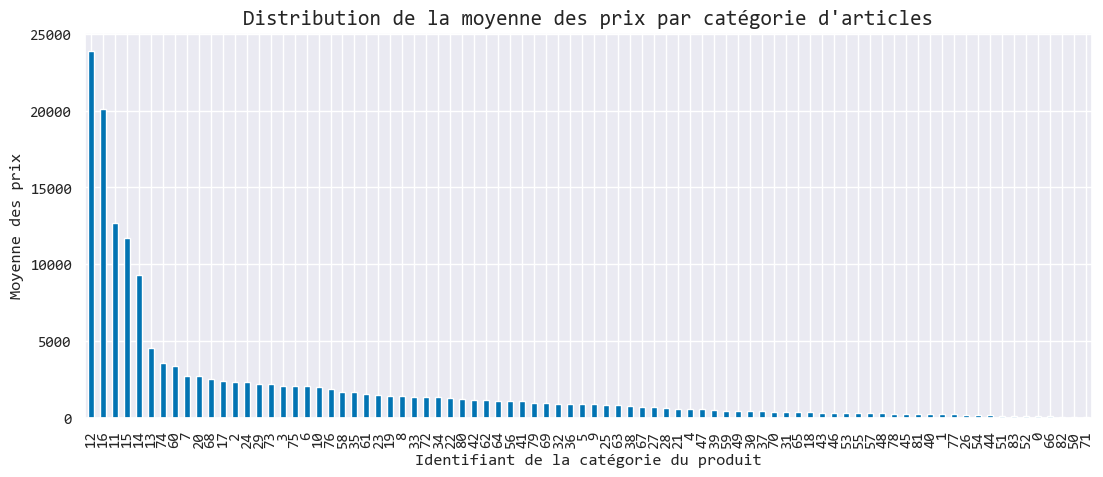

In [24]:
## Moyenne des prix par catégorie

train_month.groupby(train_month['item_category_id']).mean()['item_price'].sort_values(ascending=False).plot.bar().set(
    xlabel='Identifiant de la catégorie du produit', 
    ylabel='Moyenne des prix',
    title = "Distribution de la moyenne des prix par catégorie d'articles")


[Text(0.5, 0, 'Identifiant du produit'),
 Text(0, 0.5, 'Moyenne des prix'),
 Text(0.5, 1.0, 'Distribution de la moyenne des prix par articles (100 plus chers)')]

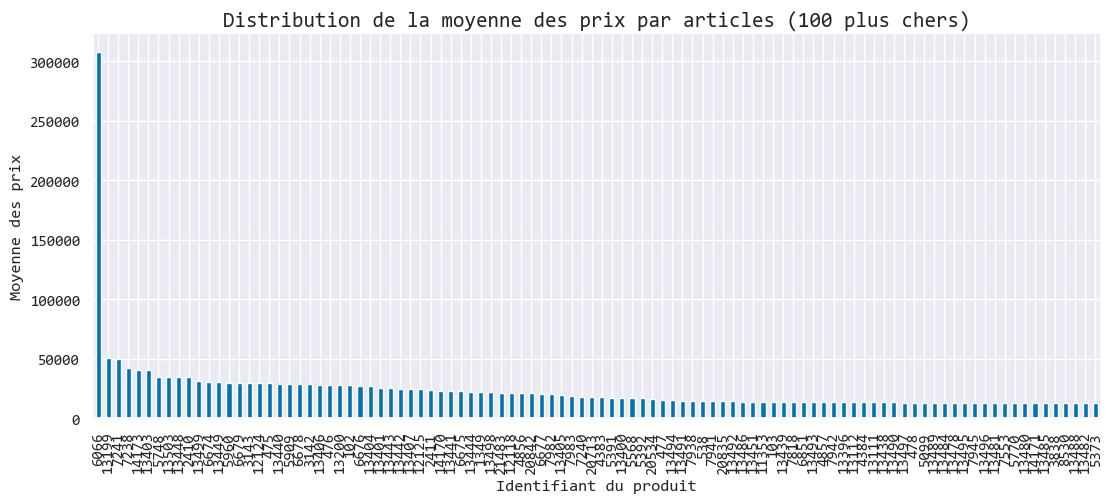

In [25]:
## les 100 produits les plus chers

train_month.groupby(train_month['item_id']).mean()['item_price'].sort_values(ascending=False).head(100).plot.bar().set(
    xlabel='Identifiant du produit', 
     ylabel='Moyenne des prix',
    title = "Distribution de la moyenne des prix par articles (100 plus chers)")


[Text(0.5, 0, 'Identifiant du produit'),
 Text(0, 0.5, 'Moyenne des prix'),
 Text(0.5, 1.0, 'Distribution de la moyenne des prix par articles (100 moins chers)')]

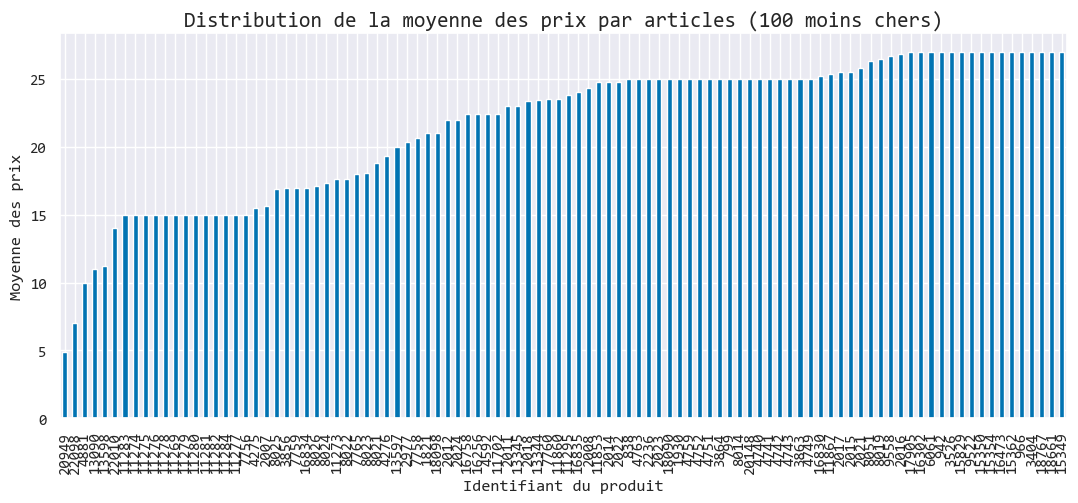

In [27]:
## les 100 produits les plus bon marché

train_month.groupby(train_month['item_id']).mean()['item_price'].sort_values().head(100).plot.bar().set(
    xlabel='Identifiant du produit', 
     ylabel='Moyenne des prix',
    title = "Distribution de la moyenne des prix par articles (100 moins chers)")

[Text(0.5, 0, 'Identifiant du magasin'),
 Text(0, 0.5, 'moyenne des prix'),
 Text(0.5, 1.0, 'Distribution de la moyenne des prix par boutique')]

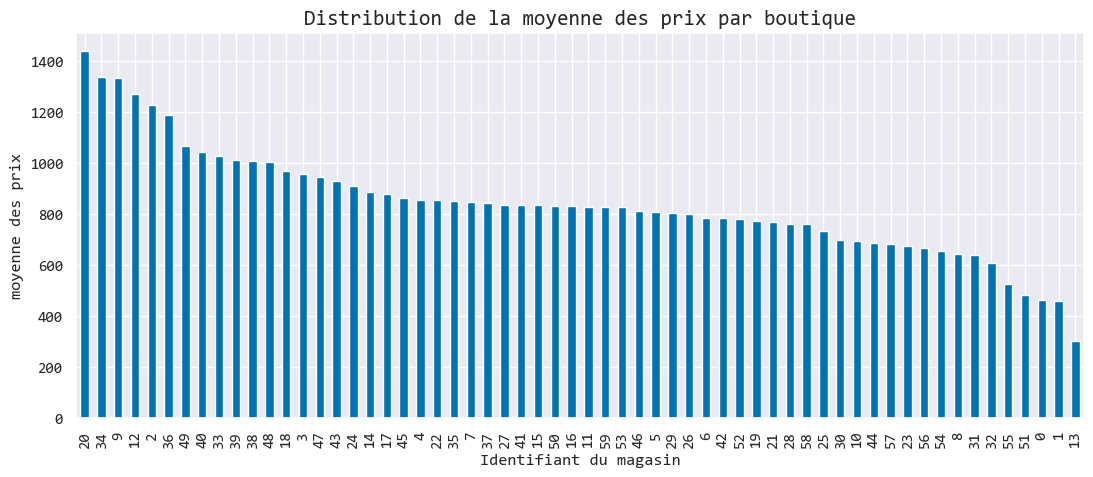

In [28]:
## Moyenne des prix par magasin

train_month.groupby(train_month['shop_id']).mean()['item_price'].sort_values(ascending=False).plot.bar().set(
    xlabel='Identifiant du magasin', ylabel='moyenne des prix',title = "Distribution de la moyenne des prix par boutique")


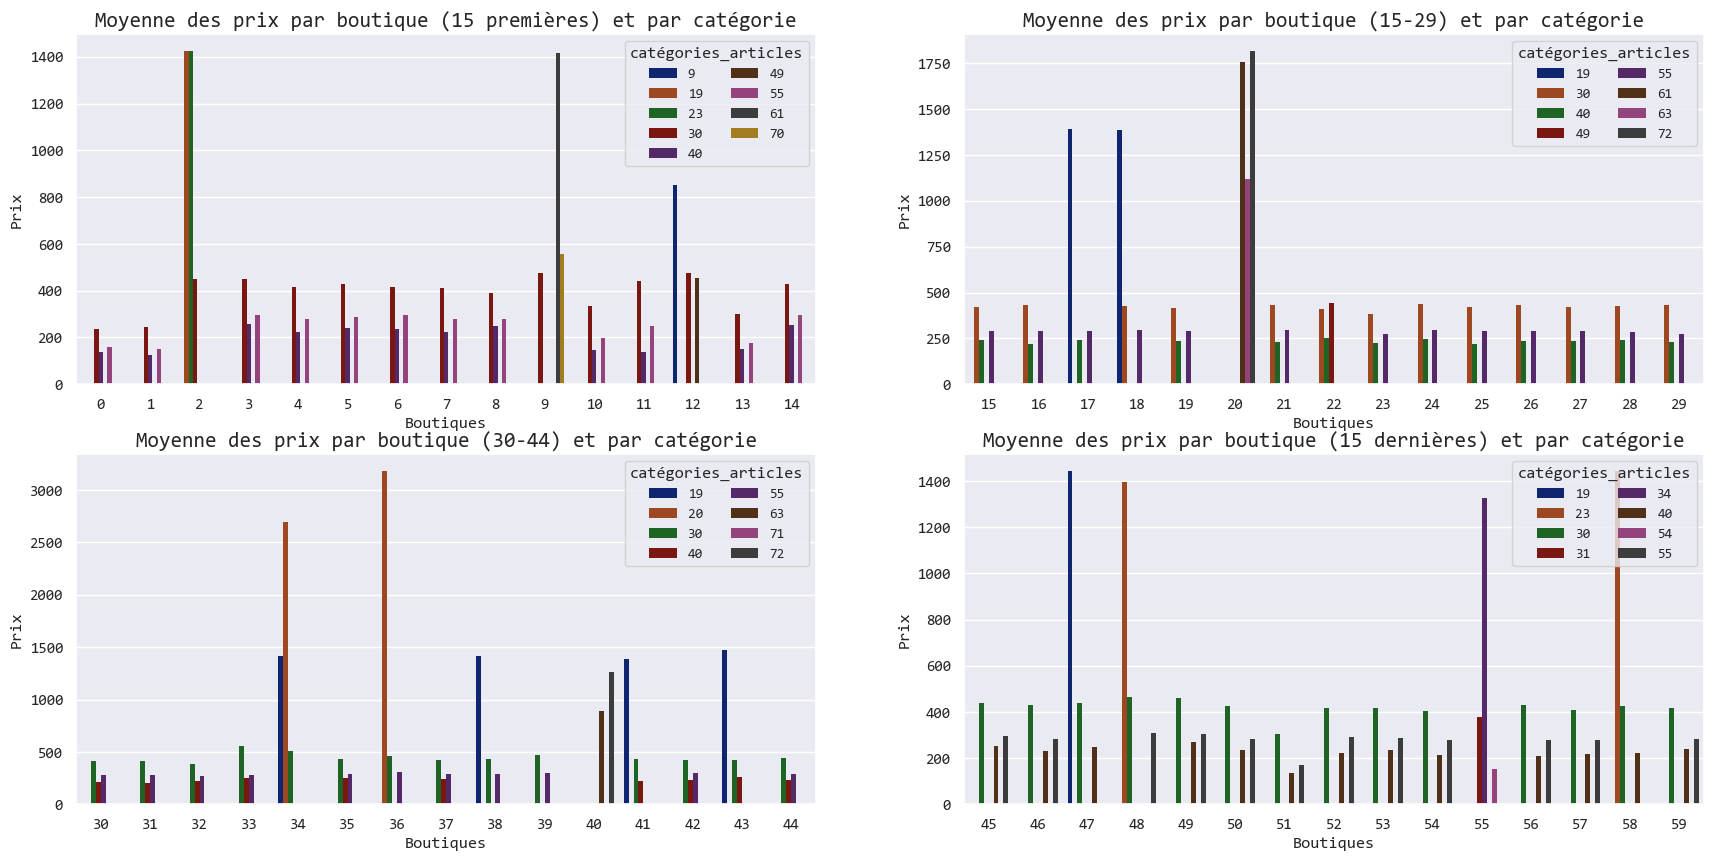

In [134]:
# Moyenne des prix par boutique pour les 3 premiers categories les plus vendus 
prix_shop_ctg = train_month.groupby(['shop_id', 'item_category_id'],
                                  as_index=False).agg( {"item_cnt_month": ["sum"],"item_price": ["mean"]})
prix_shop_ctg.columns = ['shop_id','item_category_id','item_cnt_month','item_price']
prix_shop_ctg
#trier par ventes dans chaque boutique et ne garder que les 3 premiers
prix_shop_ctg_ord = prix_shop_ctg.groupby(['shop_id']).apply(lambda x: x.sort_values(by=['item_cnt_month'], ascending=False).head(3))
prix_shop_ctg_ord
#graphique
# graques côte à côte
fig, axs = plt.subplots(2, 2, figsize=(21, 10))
# les 15 premieres boutiques
sns.barplot(x='shop_id', y='item_price', hue='item_category_id',
            data=prix_shop_ctg_ord[prix_shop_ctg_ord['shop_id'] < 15], 
            ax=axs[0, 0], palette = "dark", linewidth = 0)
axs[0, 0].legend(title='catégories_articles', loc='upper right', ncol=2, prop={'size':'smaller'})
axs[0, 0].set_xlabel("Boutiques")
axs[0, 0].set_ylabel("Prix")
axs[0, 0].set_title("Moyenne des prix par boutique (15 premières) et par catégorie")

# les 15 boutiques suivantes
sns.barplot(x='shop_id', y='item_price', hue='item_category_id', 
            data=prix_shop_ctg_ord[(prix_shop_ctg_ord['shop_id'] > 14) & (prix_shop_ctg_ord['shop_id']< 30)],
            ax=axs[0, 1], palette = "dark", linewidth = 0)
axs[0, 1].legend(title='catégories_articles', loc='upper right', ncol=2, prop={'size':'smaller'})
axs[0, 1].set_xlabel("Boutiques")
axs[0, 1].set_ylabel("Prix")
axs[0, 1].set_title("Moyenne des prix par boutique (15-29) et par catégorie")

# les 15 boutiques suivantes
sns.barplot(x='shop_id', y='item_price', hue='item_category_id', 
            data=prix_shop_ctg_ord[(prix_shop_ctg_ord['shop_id'] > 29) & (prix_shop_ctg_ord['shop_id']< 45)],
            ax=axs[1, 0], palette = "dark", linewidth = 0)
axs[1, 0].legend(title='catégories_articles', loc='upper right', ncol=2, prop={'size':'smaller'})
axs[1, 0].set_xlabel("Boutiques")
axs[1, 0].set_ylabel("Prix")
axs[1, 0].set_title("Moyenne des prix par boutique (30-44) et par catégorie")

# les 15 dernières boutiques
sns.barplot(x='shop_id', y='item_price', hue='item_category_id',
            data=prix_shop_ctg_ord[prix_shop_ctg_ord['shop_id'] > 44], 
            ax=axs[1, 1], palette = "dark", linewidth = 0)
axs[1, 1].legend(title='catégories_articles', loc='upper right', ncol=2, prop={'size':'smaller'})
axs[1, 1].set_xlabel("Boutiques")
axs[1, 1].set_ylabel("Prix")
axs[1, 1].set_title("Moyenne des prix par boutique (15 dernières) et par catégorie")
    
plt.show()

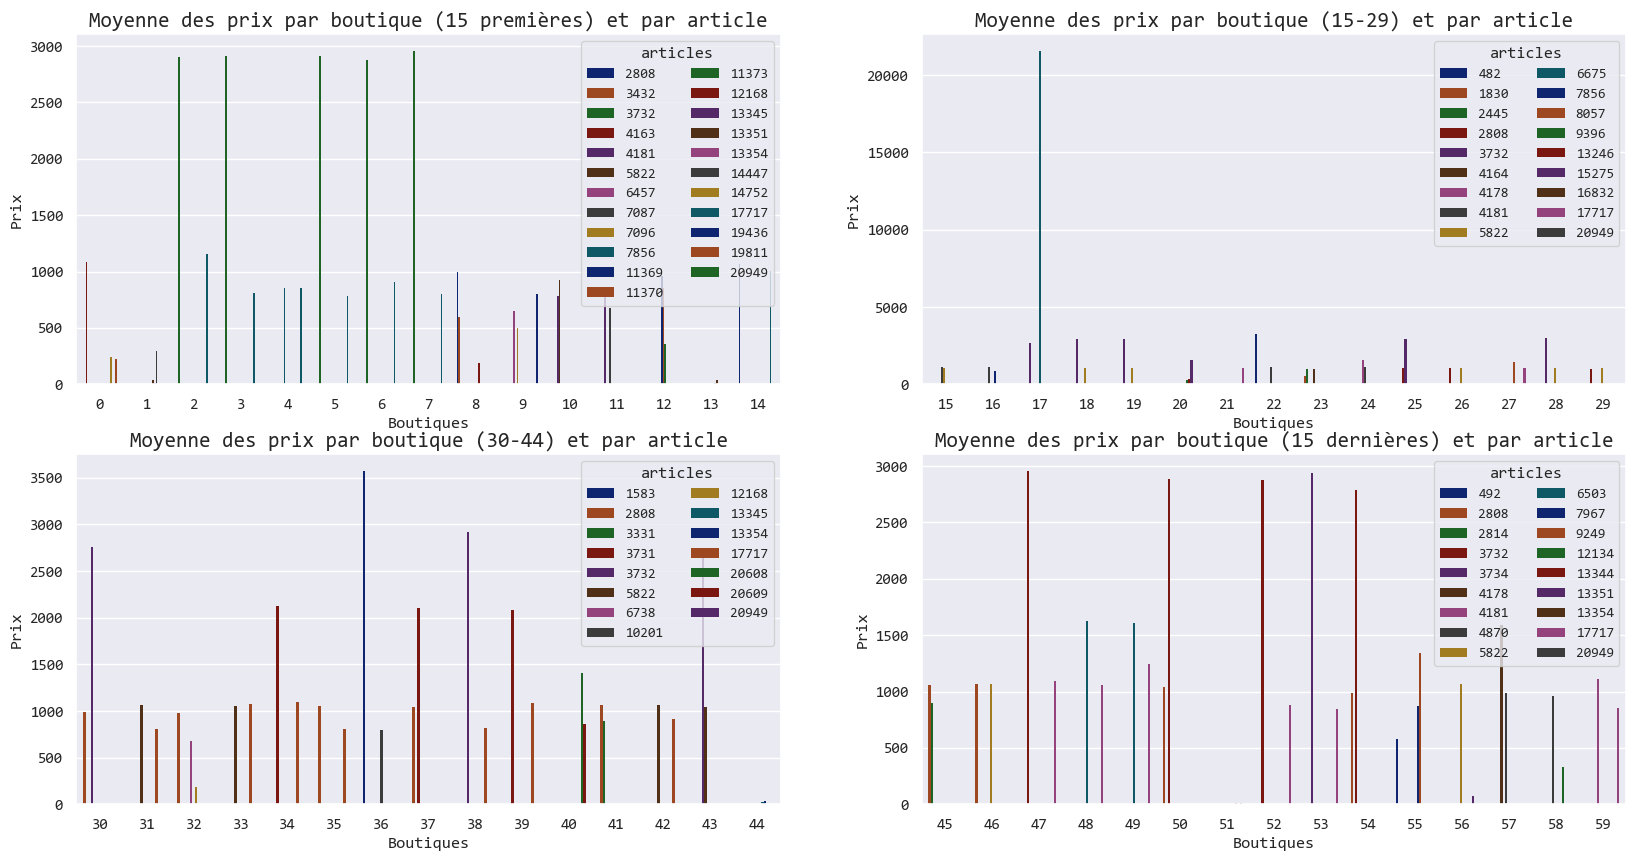

In [135]:
# Moyenne des prix par boutique pour les 3 premiers produits les plus vendus 
prix_shop_item = train_month.groupby(['shop_id', 'item_id'],
                                  as_index=False).agg( {"item_cnt_month": ["sum"],"item_price": ["mean"]})
prix_shop_item.columns = ['shop_id','item_id','item_cnt_month','item_price']
#trier par ventes dans chaque boutique et ne garder que les 3 premiers
prix_shop_item_ord = prix_shop_item.groupby(['shop_id']).apply(lambda x: x.sort_values(by=['item_cnt_month'], ascending=False).head(3))
prix_shop_item_ord
#graphique
# graques côte à côte
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
# les 15 premieres boutiques
sns.barplot(x='shop_id', y='item_price', hue='item_id',
            data=prix_shop_item_ord[prix_shop_item_ord['shop_id'] < 15], 
            ax=axs[0, 0], palette = "dark", linewidth = 0)
axs[0, 0].legend(title='articles', loc='upper right', ncol=2, prop={'size':'smaller'})
axs[0, 0].set_xlabel("Boutiques")
axs[0, 0].set_ylabel("Prix")
axs[0, 0].set_title("Moyenne des prix par boutique (15 premières) et par article")

# les 15 boutiques suivantes
sns.barplot(x='shop_id', y='item_price', hue='item_id', 
            data=prix_shop_item_ord[(prix_shop_item_ord['shop_id'] > 14) & (prix_shop_item_ord['shop_id']< 30)],
            ax=axs[0, 1], palette = "dark", linewidth = 0)
axs[0, 1].legend(title='articles', loc='upper right', ncol=2, prop={'size':'smaller'})
axs[0, 1].set_xlabel("Boutiques")
axs[0, 1].set_ylabel("Prix")
axs[0, 1].set_title("Moyenne des prix par boutique (15-29) et par article")

# les 15 boutiques suivantes
sns.barplot(x='shop_id', y='item_price', hue='item_id', 
            data=prix_shop_item_ord[(prix_shop_item_ord['shop_id'] > 29) & (prix_shop_item_ord['shop_id']< 45)],
            ax=axs[1, 0], palette = "dark", linewidth = 0)
axs[1, 0].legend(title='articles', loc='upper right', ncol=2, prop={'size':'smaller'})
axs[1, 0].set_xlabel("Boutiques")
axs[1, 0].set_ylabel("Prix")
axs[1, 0].set_title("Moyenne des prix par boutique (30-44) et par article")

# les 15 dernières boutiques
sns.barplot(x='shop_id', y='item_price', hue='item_id',
            data=prix_shop_item_ord[prix_shop_item_ord['shop_id'] > 44], 
            ax=axs[1, 1], palette = "dark", linewidth = 0)
axs[1, 1].legend(title='articles', loc='upper right', ncol=2, prop={'size':'smaller'})
axs[1, 1].set_xlabel("Boutiques")
axs[1, 1].set_ylabel("Prix")
axs[1, 1].set_title("Moyenne des prix par boutique (15 dernières) et par article")
    
plt.show()